In [125]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier , BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

### Load data 

In [126]:
train = pd.read_csv('data/cs-training.csv')

In [127]:
test = pd.read_csv('data/cs-test.csv')

### Prepare data

In [128]:
y_train = train['SeriousDlqin2yrs']

In [129]:
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [130]:
X_train['NumberOfDependents'] = X_train['NumberOfDependents'].fillna(0.0)
X_train['MonthlyIncome'] = X_train['MonthlyIncome'].fillna(0.0)

In [131]:
X_test = test.drop(['SeriousDlqin2yrs'], axis = 1)

In [132]:
X_test['NumberOfDependents'] = X_test['NumberOfDependents'].fillna(0.0)
X_test['MonthlyIncome'] = X_test['MonthlyIncome'].fillna(0.0)

### Split Train/Validation

In [133]:
X_train_plus = X_train[y_train==1]
X_train_moins = X_train[y_train==0]

In [134]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [135]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

In [136]:
for train_index, test_index in sss.split(X_train, y_train):
    X_train_, X_val_ = X_train[train_index], X_train[test_index]
    y_train_, y_val_ = y_train[train_index], y_train[test_index]

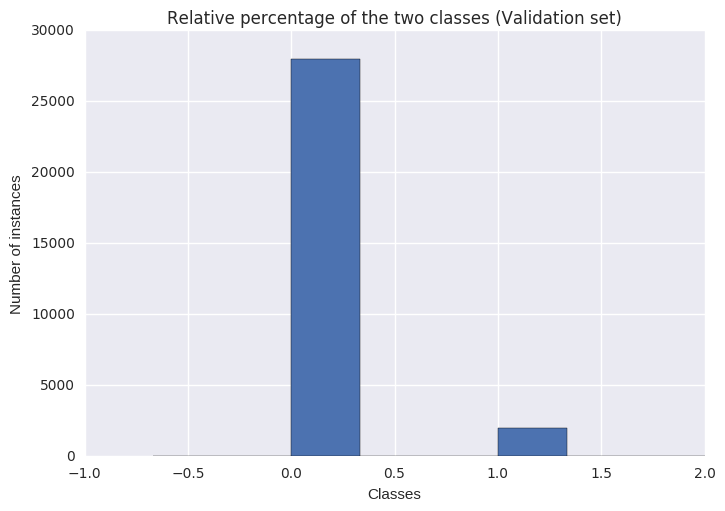

In [137]:
plt.title('Relative percentage of the two classes (Validation set)')
plt.ylabel('Number of instances')
plt.xlabel('Classes')
bins = np.linspace(-1, 2, 10)
plt.hist(y_val_, bins)
plt.show()

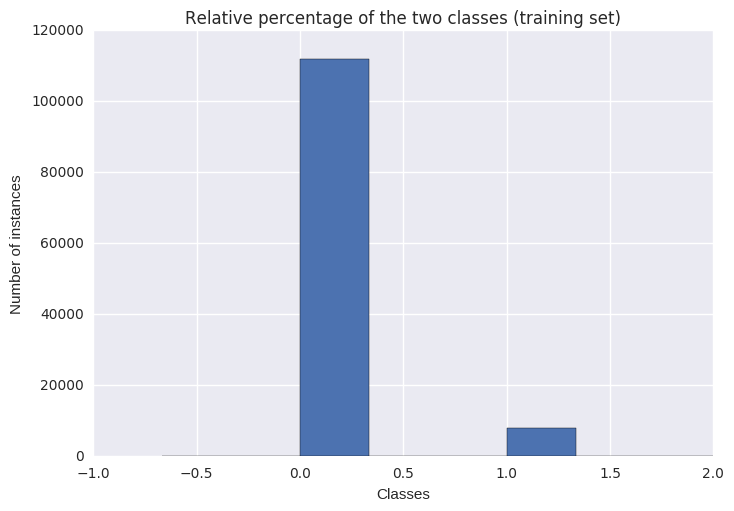

In [138]:
plt.title('Relative percentage of the two classes (training set)')
plt.ylabel('Number of instances')
plt.xlabel('Classes')
bins = np.linspace(-1, 2, 10)
plt.hist(y_train_, bins)
plt.show()

In [139]:
X_train_.shape, X_val_.shape

((120000, 11), (30000, 11))

### Learning

In [140]:
names = [ "LogisticRegression", "RandomForestClassifier" , "GradientBoostingClassifier",
"ExtraTreesClassifier",  "Neural Net", "AdaBoost",  " GaussianNB" , "QDA"]

classifiers = [
     LogisticRegression (),
     RandomForestClassifier(),
     GradientBoostingClassifier(),
     ExtraTreesClassifier(),
     MLPClassifier(),
     AdaBoostClassifier(),
     GaussianNB(),
     QuadraticDiscriminantAnalysis()]

w = []
for name, clf in zip(names, classifiers):
    print "start ", name
    clf.fit(X_train_, y_train_)
    print roc_auc_score(y_val_ , clf.predict(X_val_))  , f1_score(y_val_ , clf.predict(X_val_))
    w.append(roc_auc_score(y_val_ , clf.predict(X_val_)))

start  LogisticRegression
0.505823626324 0.02435460302
start  RandomForestClassifier
0.575030453871 0.245614035088
start  GradientBoostingClassifier
0.591742023758 0.293802601377
start  ExtraTreesClassifier
0.568333007453 0.227535672966
start  Neural Net
0.504185152407 0.0176470588235
start  AdaBoost
0.597473676053 0.302896956362
start   GaussianNB
0.507479960574 0.0309927360775
start  QDA
0.642301684617 0.364743403885


In [141]:
clf = VotingClassifier(estimators=zip(names, classifiers), voting='soft', weights=w)
clf.fit(X_train_, y_train_);

In [142]:
f1_score(y_val_ , clf.predict(X_val_)),  roc_auc_score(y_val_ , clf.predict(X_val_))

(0.27461538461538459, 0.58477667235732789)

In [143]:
np.savetxt('./data/y_kaggle.txt' , np.vstack((range(1,len(X_test)+1), clf.predict_proba(X_test)[:,0])).T, delimiter=',', \
          fmt='%d, %f', header='Id,Probability')

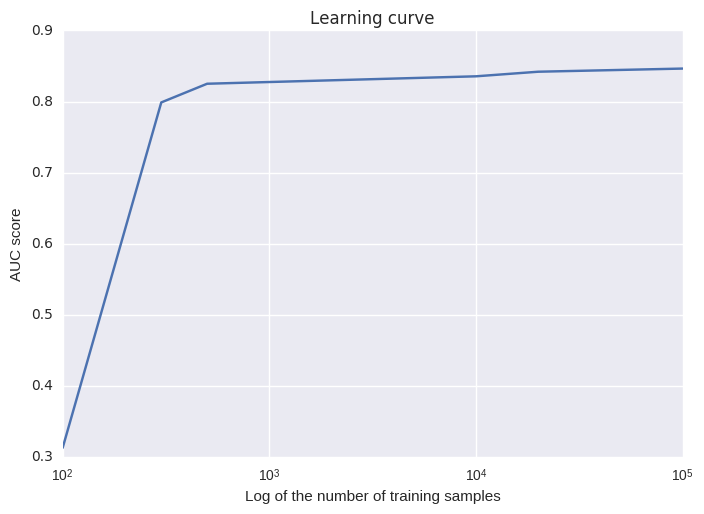

In [144]:
plt.semilogx(np.asarray([100, 300, 500, 1e4, 2e4, 1e5]) , np.asarray([0.312545, 0.798729, 0.825033, 0.835497, 0.841951, 0.846392]))
plt.xlabel('Log of the number of training samples')
plt.ylabel('AUC score')
plt.title('Learning curve')
plt.show()

### Save data 

In [145]:
train = pd.read_csv('data/cs-training.csv')
y_train = train['SeriousDlqin2yrs']
X_train = np.asarray(train.drop(['SeriousDlqin2yrs'], axis = 1))

In [146]:
for train_index, test_index in sss.split(X_train, y_train):
    X_train_, X_val_ = X_train[train_index], X_train[test_index]
    y_train_, y_val_ = y_train[train_index], y_train[test_index]

In [147]:
test = pd.read_csv('data/cs-test.csv')

In [148]:
X_test = test.drop(['SeriousDlqin2yrs'], axis = 1)

In [149]:
np.savetxt('./data/data_matrices/X_train.txt' , X_train_)

In [150]:
np.savetxt('./data/data_matrices/X_val.txt' , X_val_)

In [151]:
np.savetxt('./data/data_matrices/y_val.txt' , y_val_)

In [152]:
np.savetxt('./data/data_matrices/y_train.txt' , y_train_)

In [153]:
np.savetxt('./data/data_matrices/X_test.txt' , X_test)

In [154]:
X_train_.shape, y_train_.shape, X_val_.shape , y_val_.shape , X_test.shape

((120000, 11), (120000,), (30000, 11), (30000,), (101503, 11))